# [Occurence Data of Hong Kong Species](https://opendata.esrichina.hk/maps/esrihk::occurrence-data-of-hong-kong-species/about)
* [Hong Kong Map](https://data.gov.hk/en-data/dataset/hk-landsd-openmap-b50k-topographic-map-of-hong-kong)
* [Hong Kong Districts](https://opendata.esrichina.hk/datasets/esrihk::hong-kong-district-boundary/about)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio, rasterstats

In [2]:
hkmap = rasterio.open('hk.tif', mode='r+')
hkmap_array = hkmap.read(1)

districts = gpd.read_file('boundaries/Hong_Kong_District_Boundary.shp')
districts.to_crs(hkmap.crs, inplace=True)

species = gpd.read_file('species/O2024.shp')
species.to_crs(hkmap.crs, inplace=True)

In [3]:
bound_left, bound_right, bound_top, bound_bottom = hkmap.bounds.left, hkmap.bounds.right, hkmap.bounds.top, hkmap.bounds.bottom
extent = (bound_left, bound_right, bound_bottom, bound_top)

In [4]:
species.head(2)

,OBJECTID,scientific,family,date,OBJECTID_1,gno,Shape__Are,Shape__Len,geometry
0,1,Pyrocoelia lunata,Lampyridae,2024-05-27,453001,1435,1.175558e+06,4336.944735,"POLYGON Z ((833000.000 830000.001 0.000, 83400..."
1,2,Pyrocoelia lunata,Lampyridae,2024-05-27,453002,1366,1.175710e+06,4337.223709,"POLYGON Z ((834000.000 831000.001 0.000, 83500..."


In [5]:
districts.head(2)

,OBJECTID,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,NAME_EN,DATA_OWNER,BEGIN_LIFE,END_LIFESP,SHAPE__Are,SHAPE__Len,geometry
0,1,2016010104,DCD,D,STH,南區,Southern District,HAD,2016-01-01,None,1.102317e+08,59657.555395,"POLYGON Z ((834877.498 813336.023 0.000, 83487..."
1,2,2016010102,DCD,B,WC,灣仔區,Wan Chai District,HAD,2016-01-01,None,1.448224e+07,21374.647267,"POLYGON Z ((838416.486 813233.574 0.000, 83840..."


In [6]:
species.drop(columns=['OBJECTID'], inplace=True)
districts.drop(columns=['OBJECTID'], inplace=True)

In [ ]:
species_districts = gpd.overlay(species, districts, how='intersection')

In [8]:
species_districts.head(2)

,scientific,family,date,OBJECTID_1,gno,Shape__Are,Shape__Len,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,NAME_EN,DATA_OWNER,BEGIN_LIFE,END_LIFESP,SHAPE__Are,SHAPE__Len,geometry
0,Pyrocoelia lunata,Lampyridae,2024-05-27,453001,1435,1.175558e+06,4336.944735,2016010111,DCD,K,TW,荃灣區,Tsuen Wan District,HAD,2016-01-01,None,9.901025e+07,68195.965396,"POLYGON Z ((834000.000 830000.001 0.000, 83400..."
1,Pyrocoelia lunata,Lampyridae,2024-05-27,453002,1366,1.175710e+06,4337.223709,2016010111,DCD,K,TW,荃灣區,Tsuen Wan District,HAD,2016-01-01,None,9.901025e+07,68195.965396,"POLYGON Z ((835000.000 830000.001 0.000, 83400..."


In [9]:
species_districts['scientific'].value_counts()

scientific
Liuixalus romeri               207
Pygoluciola qingyu             166
Pycnonotus jocosus             108
Platalea minor                 108
Ardea cinerea                  103
                              ... 
Ptyas mucosus                    1
Limnodromus semipalmatus         1
Ateuchosaurus chinensis          1
Tetracanthagyna waterhousei      1
Fulica atra                      1
Name: count, Length: 486, dtype: int64

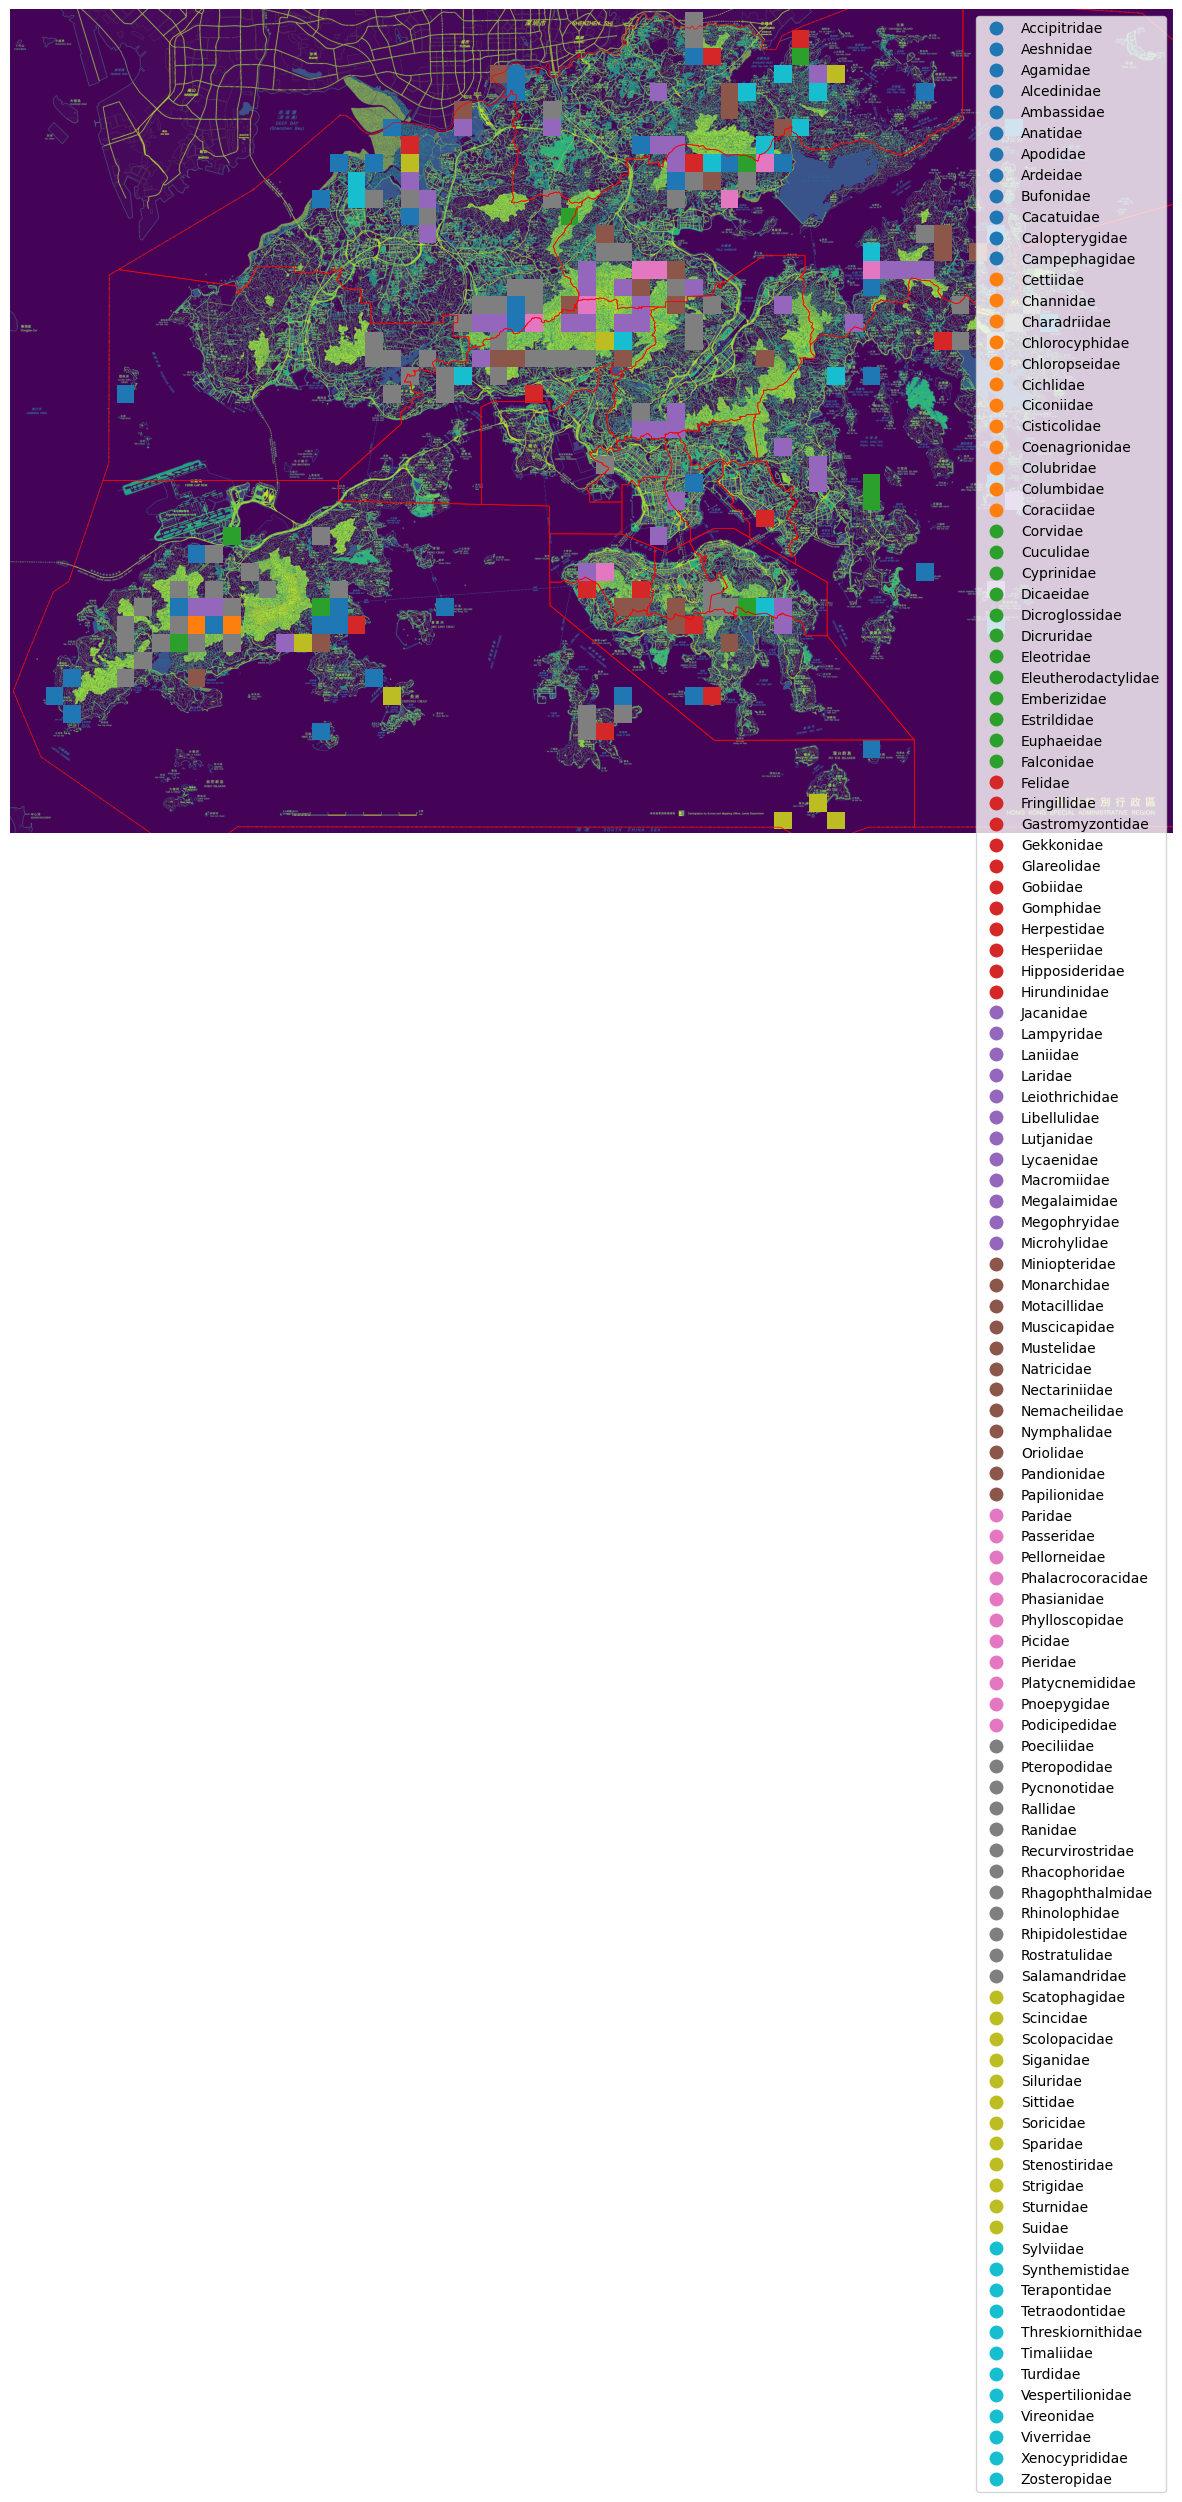

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(hkmap_array, extent=extent, origin='upper', vmin=hkmap_array.min(), vmax=hkmap_array.max())
districts.boundary.plot(ax=ax, color='red', linewidth=0.5)
species.plot(ax=ax, column='family', legend=True)
ax.set_axis_off()
ax.set(xlim=(bound_left, bound_right), ylim=(bound_bottom, bound_top))
plt.show()